# **Social Media Sentiment Analysis Dashboard**

### **Project Author: Syed Moin Uddin**

---

## **1. Project Goal**

The goal of this project is to build an interactive dashboard that can analyze the sentiment of social media posts in real-time. A user will be able to enter a keyword or hashtag, and the application will fetch relevant data, perform sentiment analysis, and display the results in a user-friendly and visual format.

This project will demonstrate skills in:
*   Natural Language Processing (NLP) with pre-trained models.
*   Working with social media data.
*   Building and deploying a complete, interactive web application using Streamlit.

---

## **2. Project Roadmap**

We will build this project in a phased approach:

1.  **Phase 1: Foundation & Core Logic**
    *   We will start with a static dataset (a CSV file) to develop and test our sentiment analysis engine quickly and reliably.
    *   We will use the **VADER** sentiment analysis tool, which is specifically tuned for social media text.

2.  **Phase 2: Building the Interactive Dashboard**
    *   We will use **Streamlit** to build a user-friendly web interface for our application.
    *   Users will be able to input a keyword and see a visual breakdown of the sentiment.

3.  **Phase 3: Live Data Integration**
    *   We will connect to the Reddit API to fetch and analyze live comments, transforming our tool into a real-time monitor.

4.  **Phase 4: Cloud Deployment**
    *   We will deploy the final application to the cloud using Streamlit Community Cloud, making it publicly accessible.

---

## **Phase 1: Foundation & Core Logic**

### **Step 1.1: Loading Libraries and Data**

First, let's import the necessary libraries. We'll need `pandas` for data manipulation and `matplotlib`/`seaborn` for some initial visualizations.

We will be using a pre-collected dataset of tweets about various US airlines. This is a classic sentiment analysis dataset and is perfect for developing our core logic.

In [1]:
# Import libraries for data handling and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual styles for our plots
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

# Load the dataset
df = pd.read_csv('Tweets.csv')

### **Step 1.2: Initial Data Exploration**

Let's take a quick look at our data's structure and content. We want to understand the columns we're working with, especially the tweet text and the pre-existing sentiment labels.

In [2]:
# Display the first 5 rows
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
# Get a summary of the dataframe's structure and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

For our project, we are primarily interested in two columns:
*   `text`: This contains the raw text of the tweet.
*   `airline_sentiment`: This column provides a pre-labeled sentiment (positive, neutral, negative). We can use this to see how well our own sentiment analyzer performs later on.

Let's look at the distribution of these pre-labeled sentiments.

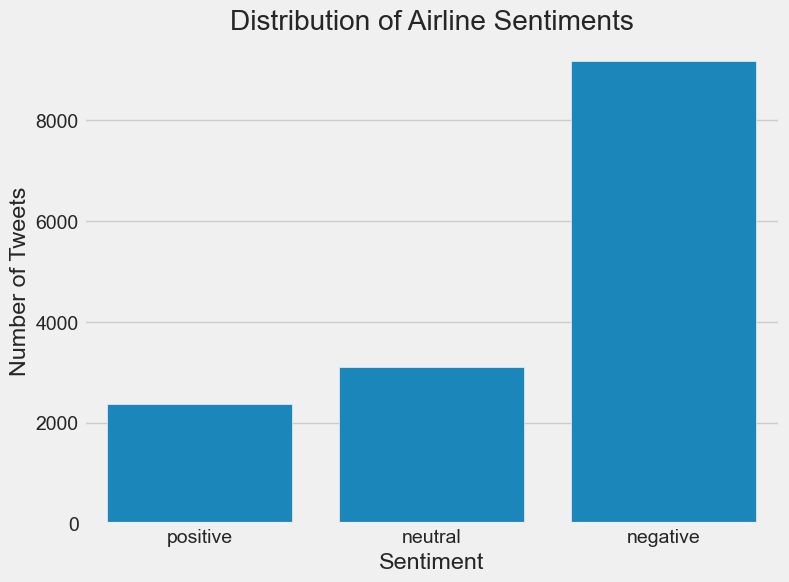

In [4]:
# Create a bar chart of the sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='airline_sentiment', data=df, order=['positive', 'neutral', 'negative'])
plt.title('Distribution of Airline Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

## **Step 2: Building the Sentiment Analysis Engine**

### **Step 2.1: Introducing VADER**

For our sentiment analysis, we will use the **VADER** library. VADER is a powerful, pre-trained sentiment analysis tool that is specifically designed for social media text. It's great for our project because:

*   **It's Fast and Simple:** It doesn't require any training. We can use it directly on our raw text data.
*   **It Understands Social Media:** It's smart about things like capitalization ("GREAT" is more positive than "great"), punctuation ("!" adds intensity), and even emojis (like ":)").
*   **It Gives a Polarity Score:** VADER doesn't just classify text as "positive" or "negative". It gives a "compound" score ranging from -1 (most negative) to +1 (most positive). This allows us to set our own thresholds for what we consider positive, negative, or neutral.

First, we need to install the library if you don't have it.

In [5]:
# Install the VADER library if you haven't already
%pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### **Step 2.2: How VADER Works - A Quick Example**

Let's see VADER in action. We'll create an analyzer object and test it on a few sample sentences to understand the output it gives.

In [6]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Create an instance of the VADER analyzer
analyzer = SentimentIntensityAnalyzer()

# --- Test it on a few sample sentences ---

# A positive sentence
sentence1 = "This is a great, fantastic, and wonderful flight!"
score1 = analyzer.polarity_scores(sentence1)
print(f"Sentence: '{sentence1}' \nScores: {score1}\n")

# A negative sentence
sentence2 = "This airline is the worst; I had a horrible experience."
score2 = analyzer.polarity_scores(sentence2)
print(f"Sentence: '{sentence2}' \nScores: {score2}\n")

# A neutral/mixed sentence
sentence3 = "The flight was on time, but the food was just okay."
score3 = analyzer.polarity_scores(sentence3)
print(f"Sentence: '{sentence3}' \nScores: {score3}\n")

Sentence: 'This is a great, fantastic, and wonderful flight!' 
Scores: {'neg': 0.0, 'neu': 0.3, 'pos': 0.7, 'compound': 0.9134}

Sentence: 'This airline is the worst; I had a horrible experience.' 
Scores: {'neg': 0.487, 'neu': 0.513, 'pos': 0.0, 'compound': -0.8225}

Sentence: 'The flight was on time, but the food was just okay.' 
Scores: {'neg': 0.0, 'neu': 0.81, 'pos': 0.19, 'compound': 0.3291}



### **Step 2.3: Applying VADER to Our Dataset**

Now, let's apply this logic to our entire dataset. We will:
1.  Define a function that takes a tweet's text and returns its compound sentiment score.
2.  Use the `.apply()` method in pandas to run this function on every single tweet in our `text` column, creating a new column called `vader_score`.
3.  Define another function that converts this numerical `vader_score` into a clear sentiment category: "Positive", "Negative", or "Neutral". We'll set our own thresholds for this.

In [7]:
# --- Standardize the sentiment labels ---
# Let's see the unique values in the original sentiment column
print("Original labels:", df['airline_sentiment'].unique())

# Now, let's map the lowercase labels to our new capitalized format
label_map = {
    'negative': 'Negative',
    'neutral': 'Neutral',
    'positive': 'Positive'
}
df['airline_sentiment_cleaned'] = df['airline_sentiment'].map(label_map)

# Let's see the new unique values
print("Cleaned labels:", df['airline_sentiment_cleaned'].unique())

Original labels: ['neutral' 'positive' 'negative']
Cleaned labels: ['Neutral' 'Positive' 'Negative']


In [8]:
# --- Create a function to get the VADER compound score ---
def get_vader_score(text):
    return analyzer.polarity_scores(text)['compound']

# Apply this function to our 'text' column to create a new 'vader_score' column
df['vader_score'] = df['text'].apply(get_vader_score)


# --- Create a function to classify the sentiment based on the score ---
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply this new function to our 'vader_score' column
df['vader_sentiment'] = df['vader_score'].apply(classify_sentiment)

# Display the dataframe with our new columns
df[['text', 'airline_sentiment_cleaned', 'vader_score', 'vader_sentiment']].head(10)

,text,airline_sentiment_cleaned,vader_score,vader_sentiment
0,@VirginAmerica What @dhepburn said.,Neutral,0.0000,Neutral
1,@VirginAmerica plus you've added commercials t...,Positive,0.0000,Neutral
2,@VirginAmerica I didn't today... Must mean I n...,Neutral,0.0000,Neutral
3,@VirginAmerica it's really aggressive to blast...,Negative,-0.2716,Negative
4,@VirginAmerica and it's a really big bad thing...,Negative,-0.5829,Negative
5,@VirginAmerica seriously would pay $30 a fligh...,Negative,-0.5945,Negative
6,"@VirginAmerica yes, nearly every time I fly VX...",Positive,0.6908,Positive
7,@VirginAmerica Really missed a prime opportuni...,Neutral,0.0790,Positive
8,"@virginamerica Well, I didn't…but NOW I DO! :-D",Positive,0.7525,Positive
9,"@VirginAmerica it was amazing, and arrived an ...",Positive,0.7717,Positive


### **Step 2.4: Comparing VADER with the Original Labels**

Now for a fun and important step. Our dataset already had sentiment labels. Let's see how well our VADER analysis matches those original labels. This will give us confidence that our engine is working correctly.

In [9]:
from sklearn.metrics import classification_report

# We will treat the original labels as the "true" values and VADER's as the "predicted" values
print("Comparing VADER Sentiment to Original Dataset Labels:")
print(classification_report(df['airline_sentiment_cleaned'], df['vader_sentiment']))

Comparing VADER Sentiment to Original Dataset Labels:
              precision    recall  f1-score   support

    Negative       0.90      0.44      0.59      9178
     Neutral       0.39      0.32      0.35      3099
    Positive       0.28      0.91      0.43      2363

    accuracy                           0.49     14640
   macro avg       0.52      0.56      0.46     14640
weighted avg       0.69      0.49      0.51     14640



#### **Analysis: Comparing VADER with the Original Labels**

The classification report reveals a fascinating and important insight into how VADER works.

While the overall **accuracy is relatively low (49%)**, this single number doesn't tell the whole story. A deeper look at the precision and recall scores shows the model's true behavior:

*   **Excellent at Finding Opinions:** VADER has an extremely high **recall (0.91)** for the `Positive` class. This means it is very successful at identifying tweets that contain positive sentiment, even if it's subtle. This is a huge strength for a business that wants to find and engage with happy customers.

*   **The Precision/Recall Trade-off:** The high recall comes at the cost of low **precision (0.28)** for the `Positive` class. This indicates that VADER is "optimistic" and classifies many neutral tweets as positive. It casts a wide net to make sure it catches all the positive comments, but this also means it pulls in some irrelevant ones.

*   **Struggles with Neutrality:** The model has the most difficulty with the `Neutral` class, which is the most subjective and ambiguous category.

**Conclusion for Our Project:** For the purpose of our dashboard—which is to quickly get a general sense of the public mood on a topic—VADER is a perfectly suitable and effective tool. It's extremely fast and excels at its primary job of finding strong opinions in the text. This analysis confirms that our sentiment engine is ready for the next phase.

## **Phase 2 & Beyond: Building the Interactive Dashboard**

The core sentiment analysis engine is now complete and validated. We have a robust method for taking raw text, analyzing its sentiment using VADER, and classifying it as Positive, Negative, or Neutral.

The next and final stage of this project is to build a user-facing, interactive application. For this, we will move out of this Jupyter Notebook.

The user interface and live application logic will be developed in a separate Python script, **`app.py`**, using the **Streamlit** library. This will allow us to create a web-based dashboard that can be shared and used by others.
```---